In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,4)

In [2]:
movies_df = pd.read_csv("movies.csv")

In [3]:
movies_df.dtypes

name         object
rating       object
genre        object
year          int64
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
released     object
dtype: object

# Cleaning Data

In [4]:
# Checking for missing data
for col in movies_df.columns:
    missing_data = np.mean(movies_df[col].isnull())
    print("{} - {}%".format(col,(missing_data*100)))


name - 0.0%
rating - 1.004173187271779%
genre - 0.0%
year - 0.0%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.03912363067292645%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 28.31246739697444%
gross - 2.464788732394366%
company - 0.2217005738132499%
runtime - 0.05216484089723526%
released - 0.02608242044861763%


In [5]:
movies_df['rating'].fillna(method = 'pad',inplace = True)
#movies_df['released'].fillna(method = 'pad',inplace = True)
movies_df['gross'].fillna(np.mean(movies_df['gross']), inplace = True)
movies_df['budget'].fillna(np.mean(movies_df['budget']), inplace = True)
movies_df['votes'].fillna(np.mean(movies_df['votes']), inplace = True)
movies_df['score'].fillna(np.mean(movies_df['score']), inplace = True)

In [6]:
movies_df['rating'].groupby(movies_df['rating']).count()

rating
Approved        1
G             155
NC-17          23
Not Rated     292
PG           1269
PG-13        2125
R            3733
TV-14           1
TV-MA           9
TV-PG           5
Unrated        52
X               3
Name: rating, dtype: int64

In [7]:
print(movies_df['gross'].mean())
print(movies_df['budget'].mean())

78500541.01778314
35589876.192650534


In [8]:
movies_df['gross'] = movies_df['gross'].astype('int64')
movies_df['budget'] = movies_df['budget'].astype('int64')
movies_df['votes'] = movies_df['votes'].astype('int64')

In [9]:
movies_df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,released
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980"
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980"
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980"
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980"


In [10]:
movies_df['Year_Released'] = movies_df['released'].astype('str').str.strip().str[-4:]
movies_df.drop('year',axis = 1,inplace = True)

In [43]:
pd.set_option('display.max_rows',20) #used to display entire dataset/ number of rows that are set inplace of None

In [12]:
movies_df.sort_values(by=['gross'], inplace=True, ascending=False)

In [13]:
movies_df.drop_duplicates()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,released,Year_Released
5445,Avatar,PG-13,Action,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,"December 18, 2009",2009
7445,Avengers: Endgame,PG-13,Action,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,"April 26, 2019",2019
3045,Titanic,PG-13,Drama,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,"December 19, 1997",1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,"December 18, 2015",2015
7244,Avengers: Infinity War,PG-13,Action,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,"April 27, 2018",2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,6.5,5200,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35589876,1400,British Broadcasting Corporation (BBC),103.0,"February 9, 2001",2001
7625,The Untold Story,Not Rated,Comedy,5.7,320,Shane Stanley,Lee Stanley,Miko Hughes,United States,35589876,790,Visual Arts Entertainment,104.0,"January 11, 2019",2019
7580,Run with the Hunted,Not Rated,Crime,5.2,735,John Swab,John Swab,Ron Perlman,United States,35589876,682,Roxwell Films,93.0,"June 26, 2020",2020
2417,Madadayo,PG,Drama,7.3,5100,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,"April 17, 1993",1993


<Axes: >

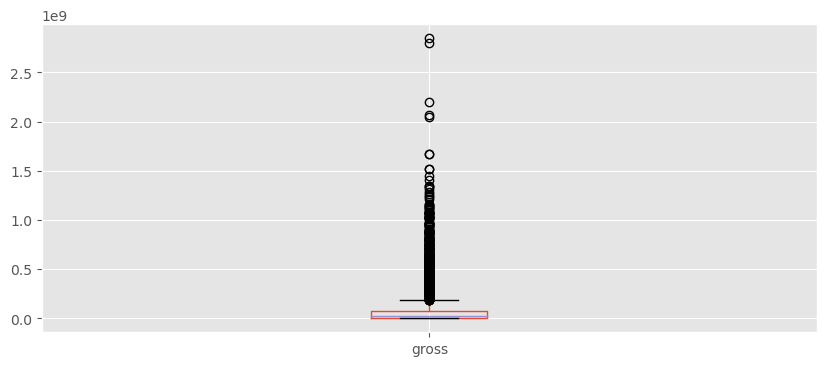

In [14]:
# Check for outliers using the boxplot

movies_df.boxplot(column=['gross'])

# Finding Co-Relation in Data.

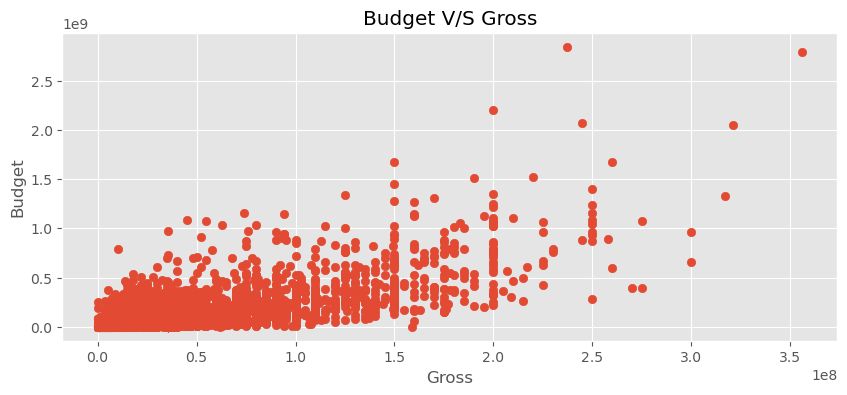

In [15]:
# Co-relation of all columns with gross value
# 1. Budget vs Gross
plt.scatter(x = movies_df['budget'], y = movies_df['gross'])
plt.ylabel('Budget')
plt.xlabel('Gross')
plt.title('Budget V/S Gross')
plt.show()

<Axes: xlabel='gross', ylabel='budget'>

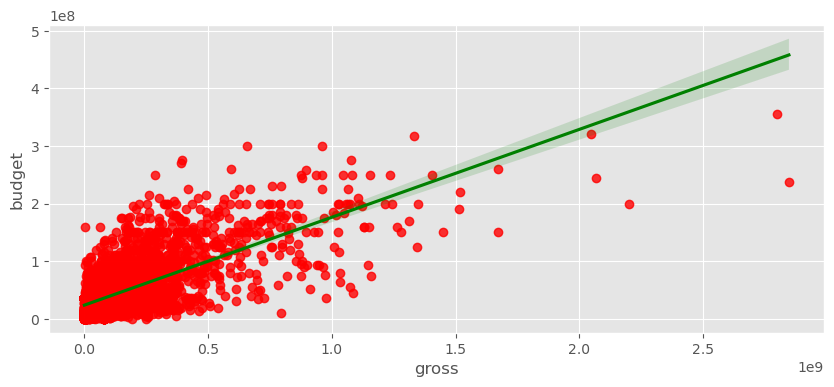

In [16]:
sns.regplot(x="gross", y="budget", data=movies_df, scatter_kws = {"color":"red"},line_kws = {"color":"green"})

In [17]:
cols = ['budget','gross','runtime','score','votes','Year_Released']
movies_df[cols].to_csv("corr.csv")


In [44]:
corr_df = pd.read_csv("corr.csv")
corr_df


,Unnamed: 0,budget,gross,runtime,score,votes,Year_Released
0,5445,237000000,2847246203,162.0,7.8,1100000,2009.0
1,7445,356000000,2797501328,181.0,8.4,903000,2019.0
2,3045,200000000,2201647264,194.0,7.8,1100000,1997.0
3,6663,245000000,2069521700,138.0,7.8,876000,2015.0
4,7244,321000000,2048359754,149.0,8.4,897000,2018.0
...,...,...,...,...,...,...,...
7663,3818,35589876,1400,103.0,6.5,5200,2001.0
7664,7625,35589876,790,104.0,5.7,320,2019.0
7665,7580,35589876,682,93.0,5.2,735,2020.0
7666,2417,11900000,596,134.0,7.3,5100,1993.0


In [45]:
corr_df.drop(corr_df.columns[0], axis = 1,inplace = True)

In [46]:
# Methods : pearson, kendall, spearman
corr_df.corr(method = 'pearson')

,budget,gross,runtime,score,votes,Year_Released
budget,1.000000,0.711270,0.265305,0.064541,0.421007,0.259546
gross,0.711270,1.000000,0.241336,0.182868,0.628713,0.245462
runtime,0.265305,0.241336,1.000000,0.399402,0.309174,0.120636
score,0.064541,0.182868,0.399402,1.000000,0.409182,0.105932
votes,0.421007,0.628713,0.309174,0.409182,1.000000,0.218300
Year_Released,0.259546,0.245462,0.120636,0.105932,0.218300,1.000000


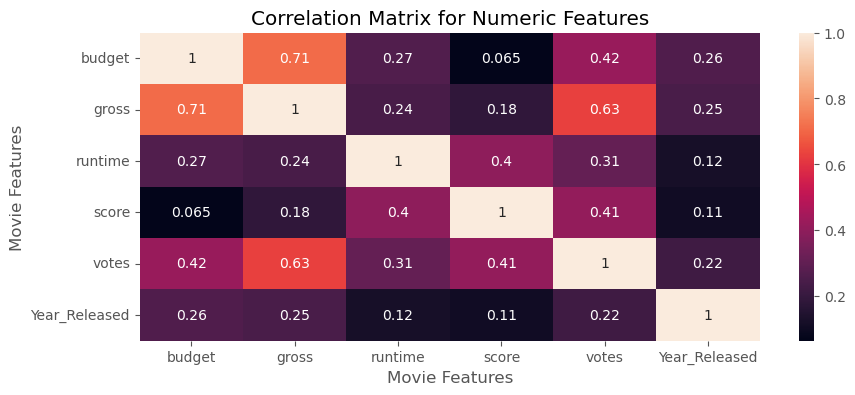

In [47]:
corr_matrix = corr_df.corr(method = 'pearson')
sns.heatmap(corr_matrix, annot = True)
plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [51]:
# Converting objects data into categorical data
categories_df = movies_df

for col in categories_df.columns:
    if categories_df[col].dtype == 'object':
        categories_df[col] = categories_df[col].astype('category')
        categories_df[col] = categories_df[col].cat.codes
        
categories_df

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,released,Year_Released
5445,533,5,0,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162.0,611,29
7445,535,5,0,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181.0,153,39
3045,6896,5,6,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194.0,617,17
6663,5144,5,0,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138.0,613,35
7244,536,5,0,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149.0,161,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,3360,6,4,6.5,5200,730,1123,2319,54,35589876,1400,477,103.0,986,21
7625,6720,3,4,5.7,320,2546,2565,1915,55,35589876,790,2308,104.0,1015,39
7580,4664,3,5,5.2,735,1445,2203,2278,55,35589876,682,1992,93.0,1627,40
2417,3406,4,6,7.3,5100,33,1718,2563,27,11900000,596,796,134.0,74,13


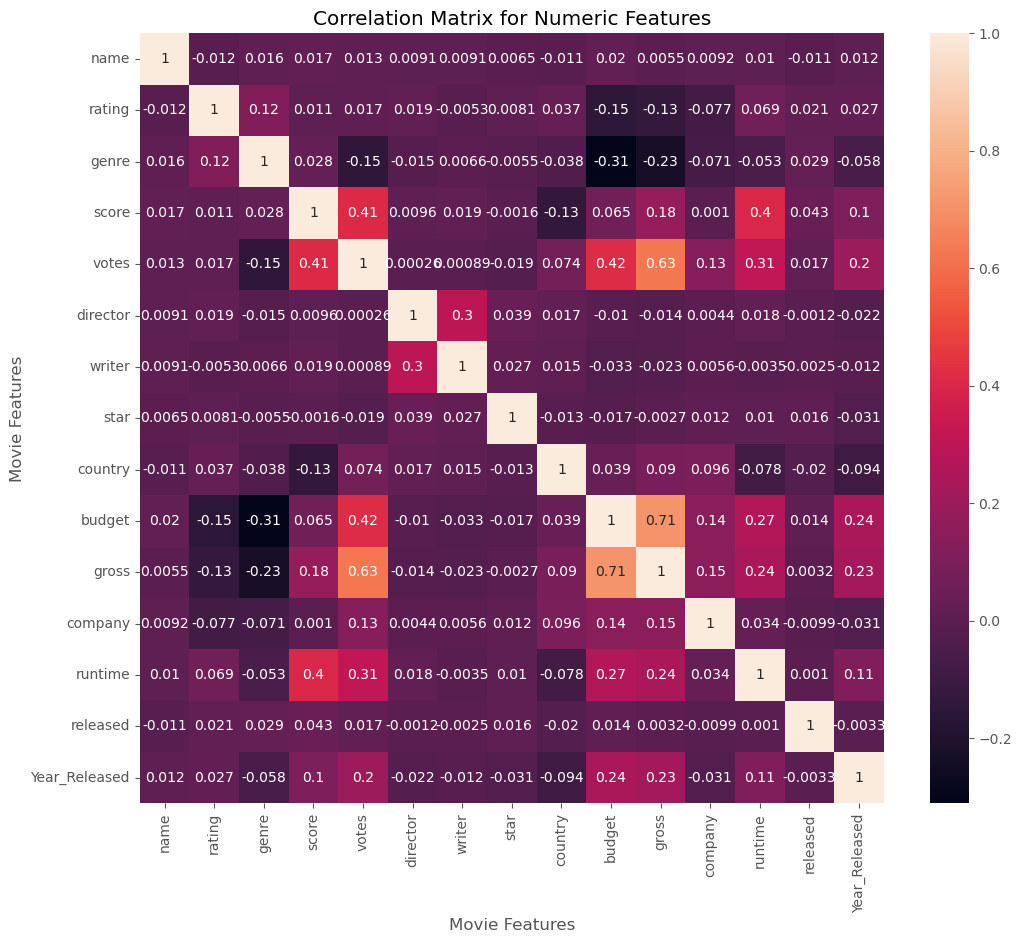

In [52]:
matplotlib.rcParams['figure.figsize'] = (12,10)
corr_matrix = categories_df.corr(method = 'pearson')
sns.heatmap(corr_matrix, annot = True)
plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [53]:
corr_mat = categories_df.corr().unstack()

In [54]:
corr_mat.sort_values(inplace = True)
high_correlation = corr_mat[(corr_mat) > 0.5]

In [55]:
high_correlation

votes          gross            0.628713
gross          votes            0.628713
budget         gross            0.711270
gross          budget           0.711270
name           name             1.000000
star           star             1.000000
runtime        runtime          1.000000
company        company          1.000000
gross          gross            1.000000
budget         budget           1.000000
country        country          1.000000
writer         writer           1.000000
director       director         1.000000
votes          votes            1.000000
score          score            1.000000
genre          genre            1.000000
rating         rating           1.000000
released       released         1.000000
Year_Released  Year_Released    1.000000
dtype: float64